### 16장 이미지 인식의 꽃, CNN 익히기

#### 2. 딥러닝 기본 프레임 만들기.

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

Using TensorFlow backend.


In [2]:
# seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

- ** 모델 프레임 설정 **
    - 784개의 속성, 10개의 클래스
    - input_dim(입력값): 784개
    - 은닉층: 512개
    - 출력: 10개
    - 활성화 함수
        - 은닉층: relu
        - 출력층: softmax
    - 오차 함수: categorical_crossentropy
    - 최적화 함수: adam

In [4]:
# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [6]:
# 모델 최적화 설정
MODEL_DIR = './model_cnn/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model_cnn/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [7]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 00001: val_loss improved from inf to 0.15504, saving model to ./model_cnn/01-0.155045.hdf5

Epoch 00002: val_loss improved from 0.15504 to 0.10495, saving model to ./model_cnn/02-0.104946.hdf5

Epoch 00003: val_loss improved from 0.10495 to 0.08422, saving model to ./model_cnn/03-0.084220.hdf5

Epoch 00004: val_loss improved from 0.08422 to 0.07865, saving model to ./model_cnn/04-0.078650.hdf5

Epoch 00005: val_loss improved from 0.07865 to 0.06742, saving model to ./model_cnn/05-0.067417.hdf5

Epoch 00006: val_loss improved from 0.06742 to 0.06464, saving model to ./model_cnn/06-0.064643.hdf5

Epoch 00007: val_loss did not improve from 0.06464

Epoch 00008: val_loss improved from 0.06464 to 0.06284, saving model to ./model_cnn/08-0.062844.hdf5

Epoch 00009: val_loss improved from 0.06284 to 0.05867, saving model to ./model_cnn/09-0.058672.hdf5

Epoch 00010: val_loss did not improve from 0.05867

Epoch 00011: val_loss did not improve from 0.05867

Epoch 00012: val_loss did not i

In [8]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

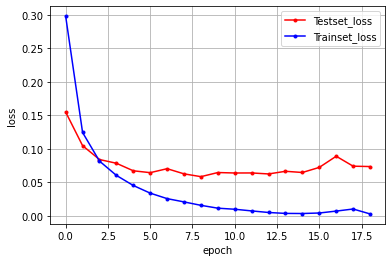

In [9]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#### 3. 더 깊은 딥러닝

- Sequential() 딥러닝 모델의 도식화  

    <img src="https://thebook.io/img/080228/227.jpg" width="130" align="left">